# Module 3 Assignment: Recursion Implementation
## Stephen Lin

In [26]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path
from functools import reduce

In [27]:
def fact(x):
  if x == 1:
    return 1
  else:
    return x * fact(x-1)

**1. Set up an array of ten random numbers between 100 and 500 (just one array with 10 numbers).**

In [28]:
np.random.seed(500)
random_numbers = list(np.random.randint(100, 500, 10))
print(random_numbers)

[446, 421, 373, 306, 387, 172, 427, 433, 337, 373]


**2. Calculate the factorial of each of the numbers using a simple FOR loop.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.**

In [29]:
for_loop_times = []
for_loop_factorials = []

for i in random_numbers:
    factorial = 1
    execution_time = 0
    
    for k in range(1,i+1):
        start = time.perf_counter()
        factorial = factorial*k
        stop = time.perf_counter()
        execution_time = (stop-start)*1000
        
    for_loop_times.append(execution_time)
    for_loop_factorials.append(factorial)
    
print(for_loop_times)
# print(for_factorials)

[0.001369999154121615, 0.0006850004865555093, 0.0006860009307274595, 0.0005609999789157882, 0.0005060010153101757, 0.0005700003384845331, 0.0007100006769178435, 0.0006220016075531021, 0.00038800135371275246, 0.0006180016498547047]


**3. Calculate the factorial of each of the numbers using recursion.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.**

In [36]:
recursion_times = []
recursion_factorials = []

for i in [446, 421, 373, 306, 387, 172, 427, 433, 337, 373]:
    start = time.perf_counter()
    factorial = fact(i)
    stop = time.perf_counter()
    execution_time = (stop-start)*1000
    
    recursion_factorials.append(factorial)
    recursion_times.append(execution_time)
    
print(recursion_times)

[2.5548710000293795, 0.3898069990100339, 0.34133900044253096, 0.25070199990295805, 0.23043800138111692, 0.0964780010690447, 0.4478680002648616, 0.2571519999037264, 0.18326499957765918, 0.20369199955894146]


**4. Organize the results of the study into a table showing the number, it's factorial, the time to calculate the factorial using recursion, the time to calculate factorial using FOR loop, and the difference between times.**

In [31]:
time_difference = [recursion_times - for_loop_times for recursion_times, for_loop_times in zip(recursion_times, for_loop_times)]

results_df = pd.DataFrame(
        {'number' : random_numbers
        ,'recursion time' : recursion_times
        ,'for loop time'  : for_loop_times
        ,'time difference' : time_difference
        })

results_df[['number','for loop time','recursion time','time difference']]

,number,for loop time,recursion time,time difference
0,446,0.001370,0.784778,0.783408
1,421,0.000685,0.229208,0.228523
2,373,0.000686,0.208250,0.207564
3,306,0.000561,0.153642,0.153081
4,387,0.000506,0.185725,0.185219
5,172,0.000570,0.068898,0.068328
6,427,0.000710,0.233951,0.233241
7,433,0.000622,0.238660,0.238038
8,337,0.000388,0.173102,0.172714
9,373,0.000618,0.175282,0.174664


**5. Use python matplotlib or seaborn to generate a graph that has number on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution times of recursion and the loop.**

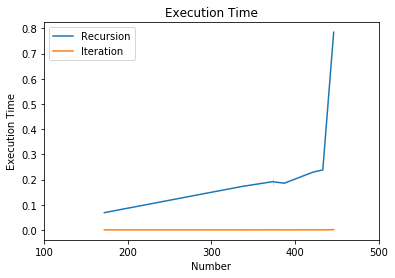

In [32]:
ax = sns.lineplot(x='number', y='recursion time', data=results_df)
ax = sns.lineplot(x='number', y='for loop time', data=results_df)
ax.legend(['Recursion','Iteration'])

plt.title('Execution Time')
plt.xlabel('Number')
plt.ylabel('Execution Time')
plt.xticks([100,200,300,400,500])
plt.show()

**EC1) Python has a built in mechanism that limits the number of recursive function calls.  Please modify the recursive factorial function (or write a new one) to allow numbers greater than this limit set by python without modifying the system recursion limit in python.  By this I mean you should not change sys.setrecursionlimit().  See if you can use the number theoretic properties of the factorial function to come up with a solution.**

**EC2) The files on a hard drive are saved in a tree-like structure.  Write a function that will print out every file from a given root using a recursive algorithm.  This is called Directory Tree Traversal (https://www.pythoncentral.io/how-to-traverse-a-directory-tree-in-python-guide-to-os-walk/ (Links to an external site.)).  You may not use any packages to do this (like os.walk, or glob), except to list the files and directories in a single directory.  In other words, you are responsible for the traversal.**

In [35]:
def print_files(root_directory):
    file_list = []
    files = os.listdir(root_directory)
    
    for i in files:
        filepath = "".join([root_directory,i,"/"])
        
        if not os.path.isdir(filepath): # base case ending in a file rather than folder
            file_list.append(filepath[:-1])    
        
        else: # recursive case that traverses further if encounters folder and not file
            printFiles(filepath) 
    
    return file_list

**Executive Summary: Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.**

In this study, we evaluate the performance of iteration (i.e. a for loop) versus recursion.  We evaluate how long each type of function takes to factorialize random numbers (i.e. take the product of the number and all the integers below it).  We find that generally speaking, iteration is a faster, less costly way of computing.  

However, recursion is useful for expressing problems that can be broken down into similar sub-problems that can be solved individually, and and whose solutions can be combined together to get an overall solution.  Recursion is a function that calls itself repeatedly until it reaches a base case that tells it to stop.  A recursive function has to invoke a function as well as perform the computation, whereas an iterative function only performs the computation.The time complexity of a recursive function that computes the factorial of a number is linear time, or O(n).  Because of this, in most cases, we would recommend the for loop.